In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine 
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sqlalchemy import create_engine, inspect, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")
session = Session(engine)

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [4]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [5]:
measurements = Base.classes.measurements
stations = Base.classes.stations

In [6]:
engine.execute('SELECT * FROM measurements LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-07', 0.06, 70.0)]

In [7]:
engine.execute('SELECT * FROM stations LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [8]:
last_date = session.query(measurements.date).order_by(measurements.date.desc()).first()
print(last_date)

('2017-08-23',)


In [9]:
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [10]:
rain = session.query(measurements.date, measurements.prcp).\
    filter(measurements.date > last_year).\
    order_by(measurements.date).all()

In [11]:
rain_df=pd.DataFrame(rain)
rain_df.set_index('date')
rain_df['date'] = pd.to_datetime(rain_df['date'])

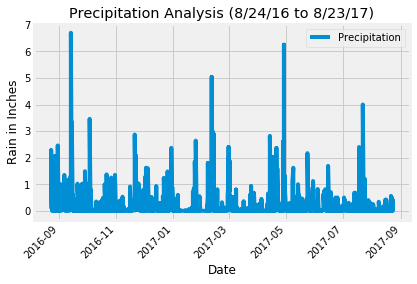

In [12]:
rain_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)

plt.show()

In [13]:
rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
stations = session.query(measurements.station).distinct(measurements.station).count()
print("There are "+ str(stations) + " stations.")

There are 9 stations.


In [15]:
active_stations = session.query(measurements.station, func.count(measurements.tobs)).group_by(measurements.station).\
               order_by(func.count(measurements.tobs).desc()).all()

most_active = active_stations[0][0]    

print("Stations and amount of observations:")
for stations, count in active_stations:
    print(stations,"had",count,"weather observations.")

Stations and amount of observations:
USC00519281 had 2772 weather observations.
USC00513117 had 2696 weather observations.
USC00519397 had 2685 weather observations.
USC00519523 had 2572 weather observations.
USC00516128 had 2484 weather observations.
USC00514830 had 1937 weather observations.
USC00511918 had 1932 weather observations.
USC00517948 had 683 weather observations.
USC00518838 had 342 weather observations.


In [16]:
print("Station",most_active,"had the most ovservations with",active_stations[0][1])

Station USC00519281 had the most ovservations with 2772


In [17]:
temperature = session.query(measurements.station, measurements.date, measurements.tobs).\
    filter(measurements.station == most_active).\
    filter(measurements.date > last_year).\
    order_by(measurements.date).all()

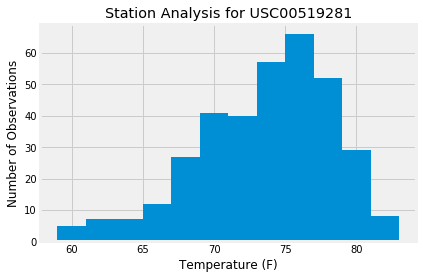

In [18]:
temp_df=pd.DataFrame(temperature)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Temperature (F)")
plt.ylabel("Number of Observations")
plt.title("Station Analysis for " + most_active)
fig.savefig("~/Desktop/myplot.pdf")
plt.show()

In [19]:
def calc_temps(start_date, end_date):   
    return session.query(func.min(measurements.tobs), func.max(measurements.tobs), func.avg(measurements.tobs)).\
        filter(measurements.date >= start_date).filter(measurements.date <= end_date).all()

In [20]:
calc_temps("2016-12-20", "2017-01-11")

[(60.0, 78.0, 70.31818181818181)]